In [24]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px

In [25]:
sns.set(
    font_scale =2,
    style      ="whitegrid",
    rc         ={'figure.figsize':(20,7)}
)

In [26]:
sales_team  = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-o-demchenko-18/lessons_6/sales_team.csv')
order_leads = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter//jupyter-o-demchenko-18/lessons_6/order_leads.csv')
invoices    = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter//jupyter-o-demchenko-18/lessons_6/invoices.csv')

In [27]:
order_leads

,Order Id,Company Id,Company Name,Date,Order Value,Converted
0,HZSXLI1IS9RGABZW,D0AUXPP07H6AVSGD,Melancholy Social-Role,2017-10-13,6952,0
1,582WPS3OW8T6YT0R,D0AUXPP07H6AVSGD,Melancholy Social-Role,2017-09-02,7930,0
2,KRF65MQZBOYG4Y9T,D0AUXPP07H6AVSGD,Melancholy Social-Role,2016-12-21,5538,1
3,N3EDZ5V1WGSWW828,D0AUXPP07H6AVSGD,Melancholy Social-Role,2018-06-03,1113,0
4,QXBC8COXEXGFSPLP,D0AUXPP07H6AVSGD,Melancholy Social-Role,2014-07-26,4596,0
...,...,...,...,...,...,...
99995,HKZFX556ZQRZJZWR,APH243SK72T90MPS,Trade-Preparatory Quarterbacks,2017-11-06,7516,0
99996,962CSDMAJ49E0CRK,APH243SK72T90MPS,Trade-Preparatory Quarterbacks,2018-08-02,442,1
99997,ZW7RO9TLL6EVVJEC,APH243SK72T90MPS,Trade-Preparatory Quarterbacks,2014-11-02,8544,0
99998,LNKGIWMZ9RT49IE9,APH243SK72T90MPS,Trade-Preparatory Quarterbacks,2017-04-01,6650,0


In [28]:
order_leads['Date'] = pd.to_datetime(order_leads.Date)

In [29]:
sales_team = sales_team.rename(columns={'Company Name': 'Company_Name', 
                                        'Company Id'  : 'Company_Id', 
                                        'Sales Rep'   : 'Sales_Rep', 
                                        'Sales_Rep_Id': 'Sales Rep Id'})

In [30]:
order_leads = order_leads.rename(columns={'Company Name': 'Company_Name', 
                                        'Company Id'  : 'Company_Id', 
                                        'Order Id'   : 'Order_Id', 
                                        'Order Value': 'Order_Value'})

In [31]:
order_leads_with_team_data = order_leads.merge(sales_team, how='left', on=['Company_Name', 'Company_Id'])

In [32]:
order_leads_with_team_data.head()

,Order_Id,Company_Id,Company_Name,Date,Order_Value,Converted,Sales_Rep,Sales Rep Id
0,HZSXLI1IS9RGABZW,D0AUXPP07H6AVSGD,Melancholy Social-Role,2017-10-13,6952,0,William Taylor,ZTZA0ZLYZR85PTUJ
1,582WPS3OW8T6YT0R,D0AUXPP07H6AVSGD,Melancholy Social-Role,2017-09-02,7930,0,William Taylor,ZTZA0ZLYZR85PTUJ
2,KRF65MQZBOYG4Y9T,D0AUXPP07H6AVSGD,Melancholy Social-Role,2016-12-21,5538,1,William Taylor,ZTZA0ZLYZR85PTUJ
3,N3EDZ5V1WGSWW828,D0AUXPP07H6AVSGD,Melancholy Social-Role,2018-06-03,1113,0,William Taylor,ZTZA0ZLYZR85PTUJ
4,QXBC8COXEXGFSPLP,D0AUXPP07H6AVSGD,Melancholy Social-Role,2014-07-26,4596,0,William Taylor,ZTZA0ZLYZR85PTUJ


In [33]:
order_leads.Date.max()

Timestamp('2018-12-31 00:00:00')

In [34]:
# график % реализованных сделок по дням (график CR подням). CR - conversion rate (коэффициент конверсии)

In [35]:
cr_by_day_rolling = order_leads.groupby(['Date']) \
           .agg({'Converted': 'mean'}) \
           .rename(columns={'Converted': 'CR'}) \
           .sort_values('Date') \
           .rolling(30).mean() #скользящее среднее

In [36]:
#выполним апгрейд графика. Переместим в самый верх


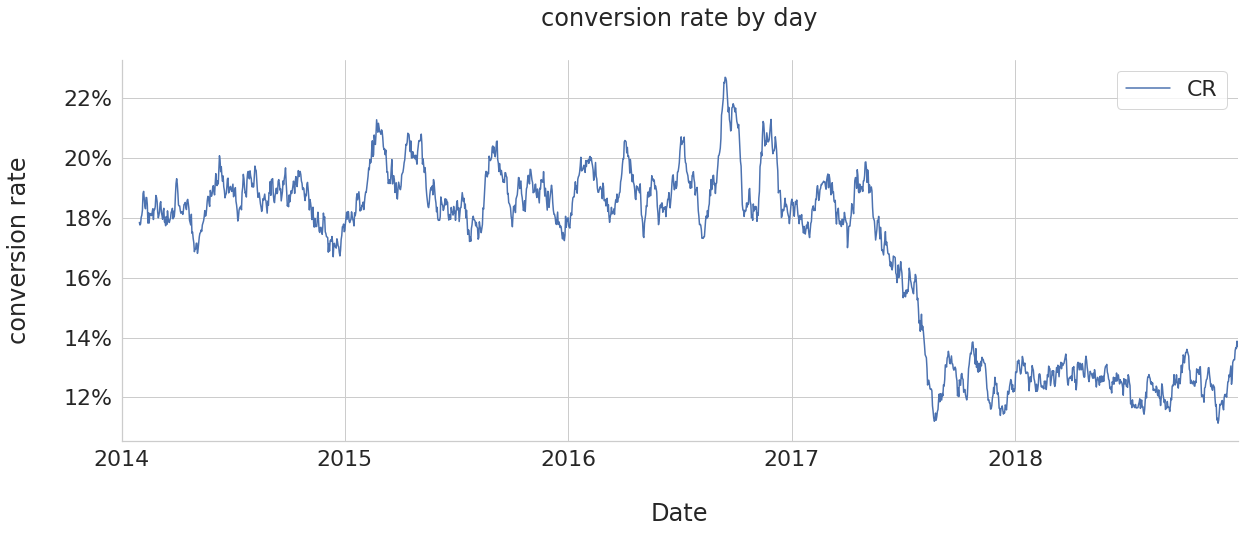

In [37]:
ax = cr_by_day_rolling.plot()
ax.set_title('conversion rate by day\n') # название заголовка
ax.set_ylabel('conversion rate\n')       # название по оси y
ax.set_xlabel('\nDate')                  # название по оси x
ax.set_yticklabels(['{:.0%}'.format(n) for n in ax.get_yticks()]) # {:.0%} .0 - кол-во знаков после точки % - вывод в %
sns.despine()                            # уберет все лишее с графика

можно забить в функцию и применять дальше по необходимости

In [38]:
def get_plot(df, x_label='', y_label='', title=''):
    ax = df.plot()

    ax.set_title(title)
    ax.set_ylabel(y_label)
    ax.set_xlabel(x_label)
    ax.set_yticklabels(['{:.0%}'.format(n) for n in ax.get_yticks()])
    sns.despine()

In [39]:
# попробуем тоже саммое через библиотеку plotly

In [40]:
cr_by_day_rolling = cr_by_day_rolling.reset_index().dropna()

In [41]:
cr_by_day_rolling

,Date,CR
29,2014-01-30,0.178512
30,2014-01-31,0.177663
31,2014-02-01,0.177996
32,2014-02-02,0.180229
33,2014-02-03,0.180944
...,...,...
1821,2018-12-27,0.135736
1822,2018-12-28,0.136614
1823,2018-12-29,0.136338
1824,2018-12-30,0.138810
